In [17]:
# Read the dataset
import pandas as pd
df = pd.read_excel("Hospital_Employees_Attrition_Data.xlsx")
print(df.head())
# Generate an unbiased sample
positive_class = df[df["Attrition"]== "Yes"]
negative_class = df[df["Attrition"]== "No"]
sample_size = min(len(positive_class), len(negative_class))
random_positive_sample = positive_class.sample(n=sample_size, random_state = 42)
random_negative_sample = negative_class.sample(n=sample_size, random_state = 42)
unbiased_sample = pd.concat([random_positive_sample, random_negative_sample], axis = 0)
sample_distribution = unbiased_sample["Attrition"].value_counts()
print(sample_distribution)

   EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

  EducationField  Gender  HourlyRate MaritalStatus  StandardHours  \
0  Life Sciences  Female          94        Single             80   
1  Life Sciences    Male          61       Married             80   
2          Other    Male          92        Single             80   
3  Life Sciences  Female          56       Married             80   
4        Medical    Male          40       Married             80   

   YearsInCurrentRole  YearsAtCompany  
0                   4               6  
1                   7              10  
2                   

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[28  6]
 [15 31]]

Classification Report:
               precision    recall  f1-score   support

          No       0.65      0.82      0.73        34
         Yes       0.84      0.67      0.75        46

    accuracy                           0.74        80
   macro avg       0.74      0.75      0.74        80
weighted avg       0.76      0.74      0.74        80



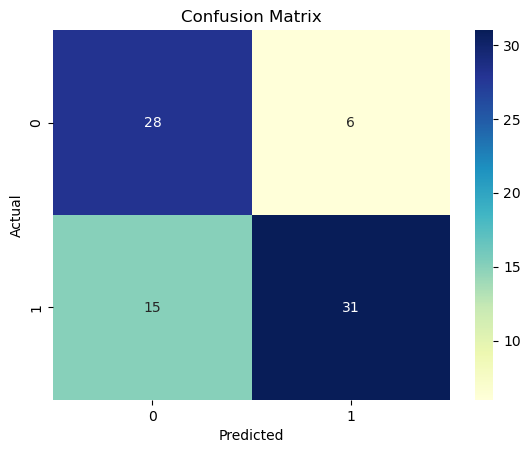

Features Coefficient and Odds Ratios:
                              Feature  Coefficient  Odds Ratio  Abs_Coefficient
9     EducationField_Human Resources     1.026496      2.7913         1.026496
17              MaritalStatus_Single     0.851083      2.3422         0.851083
3          BusinessTravel_Non-Travel    -0.589929      0.5544         0.589929
4   BusinessTravel_Travel_Frequently     0.589151      1.8025         0.589151
16             MaritalStatus_Married    -0.490668      0.6122         0.490668
13              EducationField_Other    -0.470923      0.6244         0.470923
8               Department_Neurology    -0.375834      0.6867         0.375834
15            MaritalStatus_Divorced    -0.345720      0.7077         0.345720
14   EducationField_Technical Degree    -0.314654      0.7300         0.314654
6              Department_Cardiology     0.223424      1.2504         0.223424
10      EducationField_Life Sciences    -0.203747      0.8157         0.203747
7            

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define features and target
X = unbiased_sample[["Age", "Gender", "BusinessTravel", "Department", "EducationField", "MaritalStatus"]]  # Adjust feature selection if necessary
y = unbiased_sample['Attrition']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Access the coefficients
coefficient = model.coef_[0]

# Create a dataframe to associate features with coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficient})

# Calculate the odds ratio
coef_df["Odds Ratio"] = np.exp(coef_df["Coefficient"]).round(4)

# Sort the dataframe by absolute value of coefficient
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

# Make predictions on the test set
y_predict = model.predict(X_test)

# Evaluate the model
confusion = confusion_matrix(y_test, y_predict)
classification = classification_report(y_test, y_predict)

#Display the confusion metrix
print("Confusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification)

#Plot the confusion matrix
sns.heatmap(confusion, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display features coefficient and odds ratios
print('Features Coefficient and Odds Ratios:\n', coef_df)






